In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
from sklearn import preprocessing

In [2]:
#represent data

In [3]:
class customer:
    
    def __init__(self, i, x, y, d, q, depot):
        
        self.id = i
        self.x = x
        self.y = y
        self.duration = d
        self.quantity = q
        self.depot = depot

    def show(self):
        
        print("Customer number ", self.id)
        print("Coord x ", self.x)
        print("Coord y ", self.y)
        print("Duration ", self.duration)
        print("Quantity ", self.quantity)
        print("Depot ", self.depot)

In [4]:
class depot:
    
    def __init__(self, nr, max_cars, max_weight, max_duration, customers, x, y, current_weight):
        
        self.nr = nr
        self.max_cars = max_cars
        self.max_weight = max_weight
        self.max_duration = max_duration
        self.x = x
        self.y = y
        self.clients = customers
        self.current_weight = current_weight
        
    def show(self):
        
        print("Depot number ", self.nr)
        print("Max weight of cars  ", self.max_weight)
        print("Max duration ",  self.max_duration)
        print("Coord x ", self.x)
        print("Coord y ", self.y)
        print("Customers ", self.clients)
        print("Current weight ", self.current_weight)
        
        
        
        

In [5]:
def create_chromosone():
    
    route = []
    for i in range(0, t):
        lista = np.random.permutation(depot_info[i].clients)
        lista = lista.tolist()
        route.append(lista)
    return route

In [6]:
def create_population():
    
    population = []
    for i in range(0, population_size):
        something = create_chromosone()
        population.append(something)
    return population
        

In [7]:
#calculation functions

In [8]:
def calculate_distance(x1, y1, x2, y2):
    
    x1 = int(x1)
    x2 = int(x2)
    y1 = int(y1)
    y2 = int(y2)
    distance = math.sqrt(pow(x2-x1, 2) + pow(y2-y1, 2))
    return distance

In [9]:
#read data

In [10]:
def read_depot():
    
    depot_info = []
    for i in range (0, t):
        data = f.readline()
        data = data.split()
        d = int(data[0])
        q = int(data[1])
        customers = []
        depot_data = depot(i+1, m, q, d, customers,  0, 0, 0)
        depot_info.append(depot_data)
    return depot_info

In [11]:
def first_info():
    data = f.readline()
    data = data.split()
    m = int(data[0])
    n = int(data[1])
    t = int(data[2])
    return m, n, t


In [12]:
def show_all_depots():
    
    for i in range(len(depot_info)):
        depot_info[i].show()
        print("\n")


In [13]:
def read_customers():
    
    customers = []
    for i in range(0, n):
        data = f.readline()
        data = data.split()
        nr = int(data[0])
        x = int(data[1])
        y = int(data[2])
        d = int(data[3])
        q = int(data[4])
        something = customer(nr, x, y, d, q, 0)
        customers.append(something)
    return customers

def show_all_customers():
    
    for i in range(len(customers)):
        customers[i].show()
        print("\n")



In [14]:
def read_depot_location(depot_info):
    
    for i in range(0, t):
        
        data = f.readline()
        data = data.split()
        x = int(data[1])
        y = int(data[2])
        depot_info[i].x = x
        depot_info[i].y = y    


In [15]:
#process data

In [16]:
def assign_customers():
    
    for i in range(0, n):
        distance = []
        x1 = customers[i].x
        y1 = customers[i].y
        for k in range(0, t):
            x2 = depot_info[k].x
            y2 = depot_info[k].y
            distance.append(calculate_distance(x1, y1, x2, y2))
            
    
        condition = 1
        while condition:
            smallest_distance = min(distance)
            k = distance.index(smallest_distance)
            compare = int(depot_info[k].current_weight) + int(customers[i].quantity)
            if compare <= depot_info[k].max_weight*m:
                depot_info[k].current_weight+=customers[i].quantity
                customers[i].depot = k
                depot_info[k].clients.append(i+1)
                condition = 0
            distance[k] = distance[k]*100000
            

In [17]:
def phase_1(data, k):
    
    i = 1
    weight = 0
    lista = data.copy()
    lista.insert(0, -1)
    while i < len(lista):
        if lista[i] != -1:
            if weight + customers[lista[i]-1].quantity <= depot_info[k].max_weight:
                weight += customers[lista[i]-1].quantity
            else:
                weight = 0
                lista.insert(i, -1)
                i +=1
        i+=1
    lista.insert(len(lista), -1)
    return lista

In [18]:
def check_if_ok(data, k):
    
    weight = 0
    for i in range(0, len(data)):
        if data[i] == -1:
            if weight > depot_info[k].max_weight:
                return 0
            weight = 0
        weight += int(customers[data[i]-1].quantity)
    if weight > depot_info[k].max_weight:
            return 0
    return 1       

In [19]:
def permutate(data):
    
    lista = data.copy()
    for i in range(1, len(data)-1):
        if lista[i+1] == -1:
            x = lista[i+1]
            lista[i+1] = lista[i]
            lista[i] = x
    return lista

In [20]:
def calculate_cost(data, k):
    
    x = depot_info[k].x
    y = depot_info[k].y
    cost = 0
    for i in range(0, len(data)-1):
        
        if data[i] == -1:
            x1 = x
            y1 = y
        else:
            x1 = customers[data[i]-1].x
            y1 = customers[data[i]-1].y
        if data[i+1] == -1:
            x2 = x
            y2 = y
        else:
            x2 = customers[data[i+1]-1].x
            y2 = customers[data[i+1]-1].y
        cost += calculate_distance(x1, y1, x2, y2) 
    return cost



In [21]:
def phase_2(data, k):
    
    lista = data.copy()
    lista_2 = data.copy()
    cost = calculate_cost(lista, k)
    lista_2 = permutate(lista_2).copy()
    if check_if_ok(lista_2, k):
        if calculate_cost(lista_2, k) < cost:
             lista = lista_2.copy()
    return lista
        
    

In [22]:
#route scheduler
def route_scheduler(population):
        
        population_routes = []
        for i in range(0, population_size):
            
            car = []
            for k in range(0, t):
                lista = population[i][k].copy()
                lista = phase_2(lista, k)
                lista = phase_1(lista, k)
                car.append(lista)
            population_routes.append(car)
        return population_routes
            


In [23]:
def calculate_population_score(population_routes):
    population_cost = []
    for i in range(0, population_size):
        cost = 0
        for k in range(0, t):
            cost += calculate_cost(population_routes[i][k], k)
        
        population_cost.append(cost)
    return population_cost



In [24]:
def calculate_population_fitness(population_routes):
    
    population_cost = calculate_population_score(population_routes)
    population_fitness = preprocessing.normalize([population_cost])
    population_fitness = population_fitness.tolist()
    return population_fitness



In [25]:
def medium():
    
    suma = 0
    for i in range(0, population_size):
        suma += population_fitness[i]
    return suma/population_size

In [26]:
def selection():
    
    parents = []
    threshold = medium()
    for i in range(0, population_size):
        if population_fitness[i] > threshold:
            parents.append(i)
    return parents



In [27]:
#best cost route crosssover

In [28]:
def choose_depot():
    
    x = random.randrange(0, t)
    return x

In [29]:
def choose_route(lista):
    
    x = random.randrange(0, len(lista))
    return x

In [30]:
def individual_routes(lista):
    
    individual_routes = []
    data = []
    for i in range(1, len(lista)):
        if lista[i] == -1:
            individual_routes.append(data)
            data = []
        else:
             data.append(lista[i])
        
    return individual_routes


In [31]:
def select_parents(population):
    
    k = get_best(population)
    x = random.randrange(0, len(population))
    while x==k:
        x = random.randrange(0, len(population))
    y = x
    while y == x or y==k:
        y = random.randrange(0, len(population))
    return x, y

In [32]:
def BCRC_data(population):
    x, y = select_parents(population)
    routes_population = route_scheduler(population)
    parent_1 = routes_population[x]
    parent_2 = routes_population[y]
    d = choose_depot()
    parent_1 = parent_1[d]
    parent_2 = parent_2[d]
    parent_1 = individual_routes(parent_1)
    parent_2 = individual_routes(parent_2)
    
    return parent_1, parent_2, x, y, d

In [33]:
def get_route(parent_1, parent_2):
    
    p1 = choose_route(parent_1)
    p1 = parent_1[p1]
    p2 = choose_route(parent_2)
    p2 = parent_2[p2]
    return p1, p2

In [34]:
def remove_element(lista, k):
    
    data = []
    for i in range(0, len(lista)):
        if lista[i]!=k:
            data.append(lista[i])
            
    return data

In [35]:
def remove_items(x, y):
    
    final = []
    
    for i in range(0, len(x)):
        data = x[i]
        for q in range(0, len(y)):
            data = remove_element(data, y[q])
        final.append(data)     
    return final


In [36]:
def convert(lista):
    
    final = [-1]
    for i in range(0, len(lista)):
        data = lista[i]
        for k in range(0, len(data)):
            final.append(data[k])
        final.append(-1)
        
    return final
   

In [37]:
def choose_best_insertion(data, k, d):
    
    min_cost = 10000000
    final = -1
    lista = data.copy()
    for i in range(1, len(data)-1): 
        sth = data.copy()
        sth.insert(i, k)
        if check_if_ok(sth, d):
            cost = calculate_cost(sth, d)
            if cost <= min_cost:
                min_cost = cost
                final = i
    lista.insert(final, k)
    return lista
        

In [38]:
def move(data, aux, d):
    
    for i in range(len(aux)):
        data = choose_best_insertion(data, aux[i], d)
    return data

In [39]:
def BCRC(population):
    
    parent_1, parent_2, x, y, d = BCRC_data(population)
    p1, p2 = get_route(parent_1, parent_2)
    aux1 = remove_items(parent_1, p2)
    aux2 = remove_items(parent_2, p1)
    aux1 = convert(aux1)
    aux2 = convert(aux2)
    child1 = move(aux1, p2, d)
    child2 = move(aux2, p1, d)
    child1 = individual_routes(child1)
    child2 = individual_routes(child2)
    n = []
    m = []
    for i in range(0, len(child1)):
        for k in range(0, len(child1[i])):
            n.append(child1[i][k])
    for i in range(0, len(child2)):
        for k in range(0, len(child2[i])):
            m.append(child2[i][k])
    kid1 = []
    for i in range(0, t):
        if i != d:
            kid1.append(population[x][i])
        else:
            kid1.append(n)
    kid2 = []
    for i in range(0, t):
        if i != d:
            kid2.append(population[y][i])
        else:
            kid2.append(m)
    population_new = []
    for i in range(0, population_size):
        if i == x:
            population_new.append(kid1)
        elif i==y:
            population_new.append(kid2)
        else:
            population_new.append(population[i])
    return population_new


In [40]:
def reversal_mutation(population):
    
    y = get_best(population)
    x = random.randint(0, population_size-1)
    while x==y:
        x = random.randint(0, population_size-1)
    line = population[x].copy()
    depot = random.randint(0, len(line)-1)
    line_new = line[depot].copy()
    d = []
    for i in range(0, len(population[x])):
        if i == depot:
            d.append(line_new)
        else:
            d.append(population[x][i])
    population_new = []
    for i in range(0, len(population)):
        if i == x:
            population_new.append(d)
        else:
            population_new.append(population[i])
    
    return population_new


In [41]:
f = open("Data Files/p01.txt", "r")
m, n, t = first_info()
depot_info = read_depot()   
customers = read_customers()
read_depot_location(depot_info)
assign_customers()
create_chromosone()

[[4, 17, 42, 25, 41, 13, 15, 40, 19, 44, 37, 45, 18],
 [32, 8, 23, 7, 6, 24, 43, 46, 26, 12, 31, 14, 48, 11, 47, 27, 1],
 [10, 5, 49, 38, 50, 33, 16, 9, 34, 39, 30],
 [35, 36, 2, 20, 29, 21, 3, 22, 28]]

In [42]:
population_size = 10
population = create_population()
population_arr = population.copy()
population_routes = route_scheduler(population_arr)
print(population)

[[[17, 15, 40, 13, 41, 37, 19, 4, 18, 44, 42, 45, 25], [6, 11, 46, 48, 8, 43, 24, 32, 31, 12, 7, 47, 23, 27, 26, 14, 1], [38, 16, 5, 39, 30, 50, 34, 9, 33, 10, 49], [21, 3, 2, 29, 36, 22, 28, 35, 20]], [[18, 25, 44, 17, 13, 15, 40, 37, 41, 4, 45, 19, 42], [27, 12, 24, 26, 7, 23, 46, 32, 6, 1, 8, 31, 11, 47, 48, 14, 43], [39, 50, 33, 16, 5, 30, 34, 9, 10, 49, 38], [29, 21, 3, 2, 28, 22, 36, 35, 20]], [[4, 45, 18, 15, 17, 42, 25, 44, 19, 40, 13, 41, 37], [46, 14, 8, 1, 26, 7, 32, 12, 48, 6, 31, 47, 24, 23, 27, 11, 43], [10, 16, 50, 34, 33, 49, 39, 9, 38, 5, 30], [36, 35, 3, 22, 28, 2, 20, 21, 29]], [[15, 44, 13, 19, 18, 4, 42, 41, 45, 17, 37, 40, 25], [6, 12, 24, 14, 27, 11, 23, 1, 47, 8, 26, 46, 31, 7, 43, 32, 48], [38, 9, 49, 50, 39, 10, 34, 33, 16, 5, 30], [20, 22, 35, 36, 2, 28, 29, 3, 21]], [[44, 25, 17, 41, 4, 13, 18, 19, 40, 37, 15, 45, 42], [43, 48, 7, 31, 32, 12, 11, 23, 6, 46, 24, 14, 8, 1, 26, 47, 27], [33, 16, 39, 49, 9, 30, 38, 50, 10, 5, 34], [3, 36, 35, 29, 28, 20, 22, 21,

In [43]:
population_fitness = calculate_population_fitness(population_routes)
population_fitness = population_fitness[0]
print(population_fitness)

[0.330077005719613, 0.3198736791163498, 0.3202804451261069, 0.320028422633136, 0.3107141554629572, 0.31767958021509674, 0.3177613645449603, 0.2929493606397141, 0.3280130686660022, 0.30312449072523995]


In [44]:
nr = calculate_population_score(population_routes)
print(nr)

[1062.97537166838, 1030.1167214127765, 1031.4266649802207, 1030.6150552694792, 1000.6195195748486, 1023.0508760051209, 1023.3142531169068, 943.4100228433795, 1056.3286976539964, 976.1778694277115]


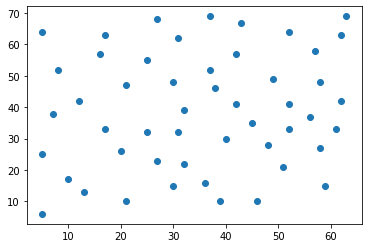

In [45]:
#data visualisation

x = []
y = []
for i in range(0, n):
    
    x.append(customers[i].x) 
    y.append(customers[i].y)

plt.scatter(x, y)

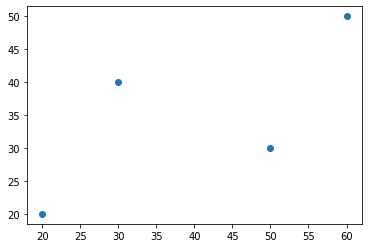

In [46]:
x1 = []
y1 = []
for i in range(0, t):
    
    x1.append(depot_info[i].x) 
    y1.append(depot_info[i].y)

plt.scatter(x1, y1)

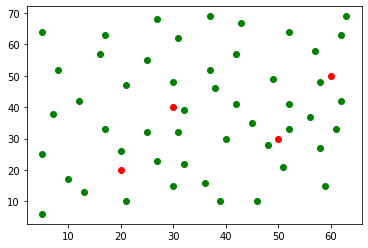

In [47]:
plt.scatter(x, y, color="green")
plt.scatter(x1, y1, color="red")
plt.show()

In [48]:
def get_best(population):
    
    new_population = route_scheduler(population)
    population_fitness = calculate_population_fitness(new_population)
    population_fitness = population_fitness[0]
    bestnr = 0
    for i in range(1, population_size):
        if population_fitness[i]<population_fitness[bestnr]:
            bestnr = i
    
    return bestnr

In [49]:
def plot_routes(population):
    
    ##plt.scatter(x, y, color="red")
    colors = ["blue", "green", "red", "purple", "yellow", "pink", "orange"]
    xl = get_best(population)
    route = population[xl]
    for i in range (0, len(route)):
        xd = []
        yd = []
        for k in range(0, len(route[i])):
            if route[i][k]==-1:
                xd.append(depot_info[i-1].x)
                yd.append(depot_info[i-1].y)
                c = random.randint(0, len(colors)-1)
                color = colors[c]
                plt.plot(xd, yd, color=color)
                xd = []
                yd = []
                xd.append(depot_info[i-1].x)
                yd.append(depot_info[i-1].y)
            else:
                xd.append(customers[route[i][k]-1].x)
                yd.append(customers[route[i][k]-1].y)
        xd.append(depot_info[i-1].x)
        yd.append(depot_info[i-1].y)
        
    plt.scatter(x1, y1, color="black")
    plt.show()
    

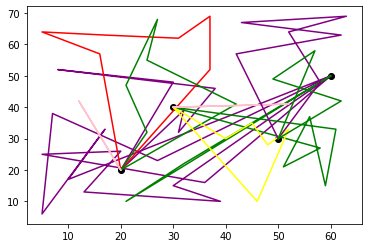

943.4100228433795


In [50]:
plot_routes(population_routes)
print(min(calculate_population_score(population_routes)))

In [51]:
minimum_distance = []

840.9121841465721


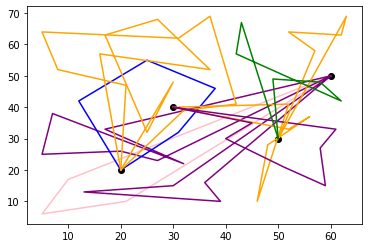

In [52]:
#ga
mutation_rate = 1
crossover_rate = 1
ti = 0;
while ti!=1000:
    
    for i in range(0, crossover_rate):
        population = BCRC(population)
    for j in range(0, mutation_rate):
        population = reversal_mutation(population)
    population_now = route_scheduler(population)
    nr = calculate_population_score(population_now)
    minimum_distance.append(nr[get_best(population)])  
    ti+=1
population_now = route_scheduler(population)
print(min(minimum_distance))
plot_routes(population_now)

In [53]:
print(min(minimum_distance))

840.9121841465721


840.9121841465721


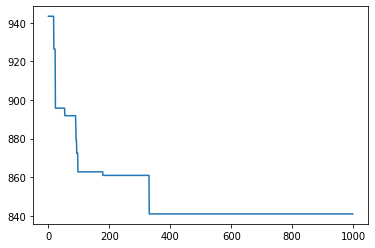

In [54]:
plt.plot(range(0, ti), minimum_distance)
print(min(minimum_distance))
plt.show()

In [55]:
p = population_now[get_best(population)]
print(p)

[[-1, 41, 40, 42, -1, 18, 37, 25, 13, 4, 17, -1, 15, 45, 19, 44, -1], [-1, 14, 48, 32, 12, -1, 27, 47, 7, 26, 1, 23, -1, 6, 24, 43, 8, 31, 11, 46, -1], [-1, 9, 50, 49, 33, 16, -1, 34, 30, 39, 10, 5, 38, -1], [-1, 20, 3, 35, 36, -1, 28, 22, 21, 29, 2, -1]]


In [56]:
def calculate(data, k):
    
    lista = [0]
    x = depot_info[k].x
    y = depot_info[k].y
    x1 = customers[data[0]-1].x
    y1 = customers[data[0]-1].y
    cost = 0
    cost += calculate_distance(x, y, x1, y1)
    lista.append(customers[data[0]-1].id)
    weight = 0
    weight += customers[data[0]-1].quantity
    for i in range(1, len(data)-1):
            x2 = x1
            y2 = y1
            x1 = customers[data[i]-1].x
            y1 = customers[data[i]-1].y
            lista.append(customers[data[i]-1].id)
            cost += calculate_distance(x1, y1, x2, y2) 
            weight += customers[data[i]-1].quantity
    cost += calculate_distance(x, y, x1, y1) 
    if len(data)!=1:
        weight += customers[data[-1]-1].quantity
        lista.append(customers[data[-1]-1].id)
    lista.append(0)
    return cost, weight, lista



In [57]:
for i in range(0, len(p)):
    lista = individual_routes(p[i])
    for j in range(0, len(lista)):
        cost, weight, l = calculate(lista[j], i)
        cost = str(round(cost, 2))
        print(i+1,' ', j+1, ' ', cost, ' ', weight, ' ', *l)

1   1   43.04   47   0 41 40 42 0
1   2   95.81   113   0 18 37 25 13 4 17 0
1   3   59.27   45   0 15 45 19 44 0
2   1   62.31   79   0 14 48 32 12 0
2   2   100.72   89   0 27 47 7 26 1 23 0
2   3   113.48   94   0 6 24 43 8 31 11 46 0
3   1   59.81   77   0 9 50 49 33 16 0
3   2   64.36   100   0 34 30 39 10 5 38 0
4   1   39.56   67   0 20 3 35 36 0
4   2   69.13   66   0 28 22 21 29 2 0
